<a href="https://colab.research.google.com/github/IqbalPratama17/Machine-Learning/blob/Python/Praktikum4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Melakukan Pemanggilan file
path_ ="/content/drive/My Drive/Machine Learning/dataset/Data Rumah.csv"
dataset = pd.read_csv(path_, usecols=['horsepower', 'price'])
dataset

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
195,114.0,16845.0
196,160.0,19045.0
197,134.0,21485.0
198,106.0,22470.0


In [ ]:
# Menampilkan banyak baris dan kolom
dataset.shape

(200, 2)

In [ ]:
# Menampilkan tipe data dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
# Menampilkan resume dari dataset
dataset.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [ ]:
# Dengan perintah isnull dan method sum, kita dapat mengetahui jika ada data yang kosong
dataset.isnull().sum()

horsepower    0
price         0
dtype: int64

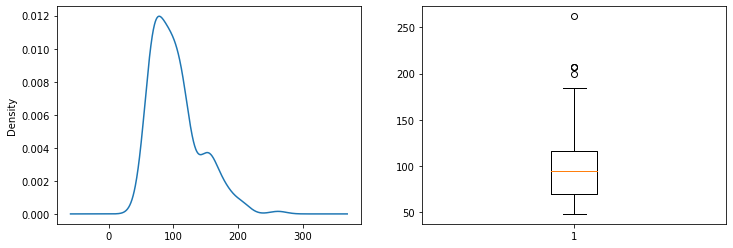

In [ ]:
# Gunakan EDA(exploratory Data Analysis)
# EDA merupakan pendekatan untuk menganalisis set data untuk merangkum karakteristik utama dari dataset,
# seringkali ditampilkan dalam bentuk visual.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
dataset['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(dataset['horsepower'])
plt.show()

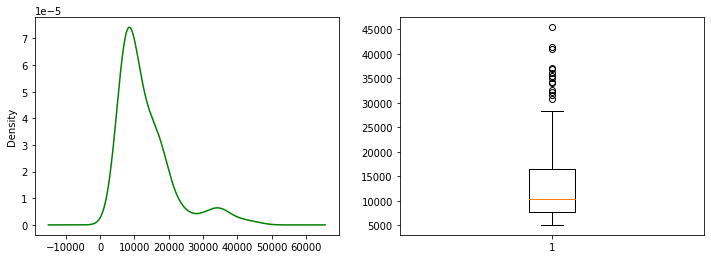

In [ ]:
# Gunakan EDA(exploratory Data Analysis)
# EDA merupakan pendekatan untuk menganalisis set data untuk merangkum karakteristik utama dari dataset,
# seringkali ditampilkan dalam bentuk visual.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
dataset['price'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(dataset['price'])
plt.show()

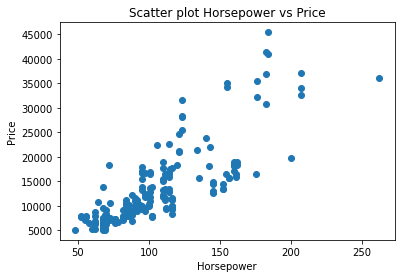

In [ ]:
# Lakukan analisis secara bivariate
# Menggunakan scatter plot
plt.scatter(dataset['horsepower'], dataset['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter plot Horsepower vs Price')
plt.show()

In [ ]:
# Gunakan fungsi corr() untuk mendapatkan nilai korelasi atau hubungan antara 2 fitur yang ada
dataset.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [ ]:
# Kita jadikan horsepower sebagai variable x(bebas) dan price sebagai variable y(terikat)
# Selanjutnya dengan train_test_split lakukan pembagian dataset untuk data training dan data testing

# Buat variabel x dan y
x = dataset['horsepower'].values.reshape(-1,1) # Variabel bebas
y = dataset['price'].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Regersi Linear
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Nilai yang dihasilkan
print(lin_reg.coef_) # Nilai m
print(lin_reg.intercept_) # Nilai b
# y=168.415x-4270.494

[[177.89211181]]
[-4940.62912857]


In [ ]:
# Perintah score digunakan untuk menghitung nilai akurasi dari data training dengan data testing
lin_reg.score(x_test, y_test) # Nilai akurasi data sekitar 57%

0.6539110647752449

Text(0.5, 1.0, 'Plot Horsepower vs Price')

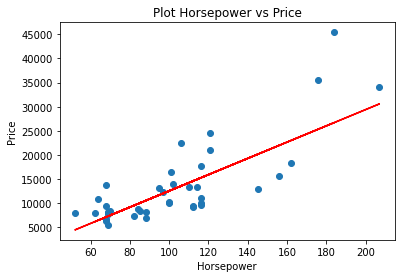

In [ ]:
# Selanjutnya kita akan memprediksi harga jika data fitur horsepower diketahui
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test) # Gambar yang titik
plt.plot(x_test, y_prediksi, c='r') # Garis merah
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [ ]:
# Selanjutnya kita dapat menentukan nilai prediksi lainnya, jika diketahui nilai horsepowernya

# Prediksi harga mobil dengan horsepower 100
lin_reg.predict([[100]])

array([[12933.72903616]])

In [ ]:
# Prediksi harga mobil dengan horsepower 150
lin_reg.predict([[150]])

array([[21925.68010353]])

In [ ]:
# Prediksi harga mobil dengan horsepower 200
lin_reg.predict([[200]])

array([[30917.63117091]])